In [1]:
import omama as O

In [1]:
import sys
import time
sys.path.insert(0,'../..')
import omama as O

In [2]:
omama_loader = O.OmamaLoader()
data = O.Data(data_loader=omama_loader, load_cache=True)

Loading config data from ini file
DataLoader type is:  <class 'omama.loaders.omama_loader.OmamaLoader'>


In [16]:
#cc image
img1 = O.DataHelper.get(image='DXm.2.25.64046560412584644158952823243614952373') 

In [17]:
img1


namespace(filePath='/raid/data01/deephealth/dh_dh0new/2.25.221825924691862094384875484598351212081/DXm.2.25.64046560412584644158952823243614952373',
          SOPInstanceUID='2.25.64046560412584644158952823243614952373',
          StudyInstanceUID='2.25.221825924691862094384875484598351212081',
          PatientID='DHZZV5DHQ9MO',
          InstanceNumber="345",
          label='IndexCancer',
          imageLaterality='L',
          shape=(2457, 1890),
          metadata=Dataset.file_meta -------------------------------
                   (0002, 0000) File Meta Information Group Length  UL: 192
                   (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
                   (0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
                   (0002, 0003) Media Storage SOP Instance UID      UI: 2.25.64046560412584644158952823243614952373
                   (0002, 0010) Transfer Syntax UID                 

In [8]:
#mlo image
img2 = O.DataHelper.get(image='DXm.2.25.42787637300013931407657251593974357220') 

In [9]:
img2

namespace(filePath='/raid/data01/deephealth/dh_dh0new/2.25.221825924691862094384875484598351212081/DXm.2.25.42787637300013931407657251593974357220',
          SOPInstanceUID='2.25.42787637300013931407657251593974357220',
          StudyInstanceUID='2.25.221825924691862094384875484598351212081',
          PatientID='DHZZV5DHQ9MO',
          InstanceNumber="351",
          label='IndexCancer',
          imageLaterality='L',
          shape=(2457, 1890),
          metadata=Dataset.file_meta -------------------------------
                   (0002, 0000) File Meta Information Group Length  UL: 192
                   (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
                   (0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
                   (0002, 0003) Media Storage SOP Instance UID      UI: 2.25.42787637300013931407657251593974357220
                   (0002, 0010) Transfer Syntax UID                 

In [11]:
pred = O.DeepSight.run([img2], timing=True)

Time to parse SOP UIDs:  6.9141387939453125e-06
Time to check cache:  0.7195937633514404
...took 0.7605266571044922


In [12]:
pred

{'2.25.42787637300013931407657251593974357220': {'coords': [438.0,
   848.0,
   687.0,
   1098.0],
  'score': 0.06202894449234009,
  'errors': None}}

type of data:  <class 'omama.data.Data'>
bb: [438, 848, 687, 1098]


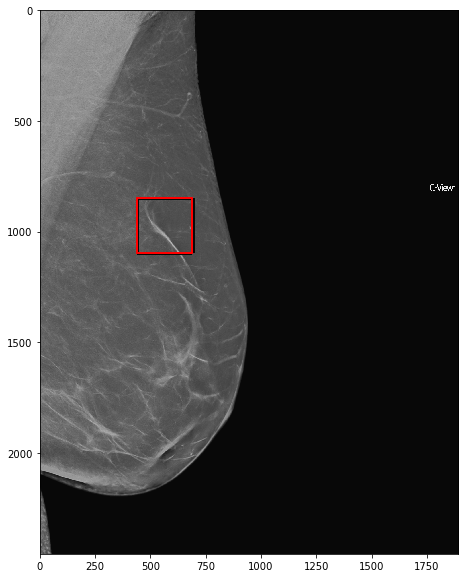

In [13]:
O.DataHelper.view(image=img2, roi_coords=pred['2.25.42787637300013931407657251593974357220']['coords'])

In [18]:
pred2 = O.DeepSight.run([img1], timing=True)

Time to parse SOP UIDs:  6.198883056640625e-06
Time to check cache:  0.887218713760376
...took 0.9367167949676514


In [19]:
pred2

{'2.25.64046560412584644158952823243614952373': {'coords': [81.0,
   1279.0,
   350.0,
   1522.0],
  'score': 0.12638108432292938,
  'errors': None}}

type of data:  <class 'omama.data.Data'>
bb: [81, 1279, 350, 1522]


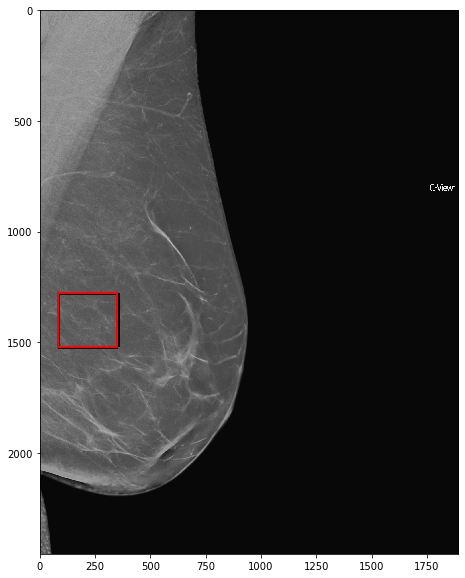

In [20]:
O.DataHelper.view(image=img2, roi_coords=pred2['2.25.64046560412584644158952823243614952373']['coords'])

In [21]:
imgs = O.DataHelper.get2D(N=1, cancer=True, randomize=True, timing=True, config_num=35)


Loading config data from ini file
DataLoader type is:  <class 'omama.loaders.omama_loader.OmamaLoader'>
get2D                    ...took     1.615466 seconds


In [22]:
imgs


[namespace(filePath='/raid/data01/deephealth/dh_dcm_ast/2.25.32755965876670376104892007560959793987/DXm.2.25.128946062814301730757452786958194531277',
           SOPInstanceUID='2.25.128946062814301730757452786958194531277',
           StudyInstanceUID='2.25.32755965876670376104892007560959793987',
           PatientID='DH20P18XTBH4',
           InstanceNumber="4",
           label='IndexCancer',
           imageLaterality='L',
           shape=(2294, 1914),
           metadata=None,
           pixels=array([[3353, 3251, 3183, ...,  846,  844,  847],
                         [3316, 3245, 3202, ...,  846,  843,  847],
                         [3206, 3210, 3207, ...,  847,  845,  846],
                         ...,
                         [ 860,  886,  898, ...,  894,  898,  896],
                         [ 856,  883,  900, ...,  898,  897,  901],
                         [ 858,  888,  900, ...,  902,  895,  902]], dtype=uint16))]

In [23]:
img_rand = O.DataHelper.get2D(N=60, cancer=True, randomize=True, timing=True, config_num=35)

Loading config data from ini file
DataLoader type is:  <class 'omama.loaders.omama_loader.OmamaLoader'>
get2D                    ...took    22.517047 seconds


/home/j.somisetty001/projects/omama/omama/helpers/data_helper.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(pixels)


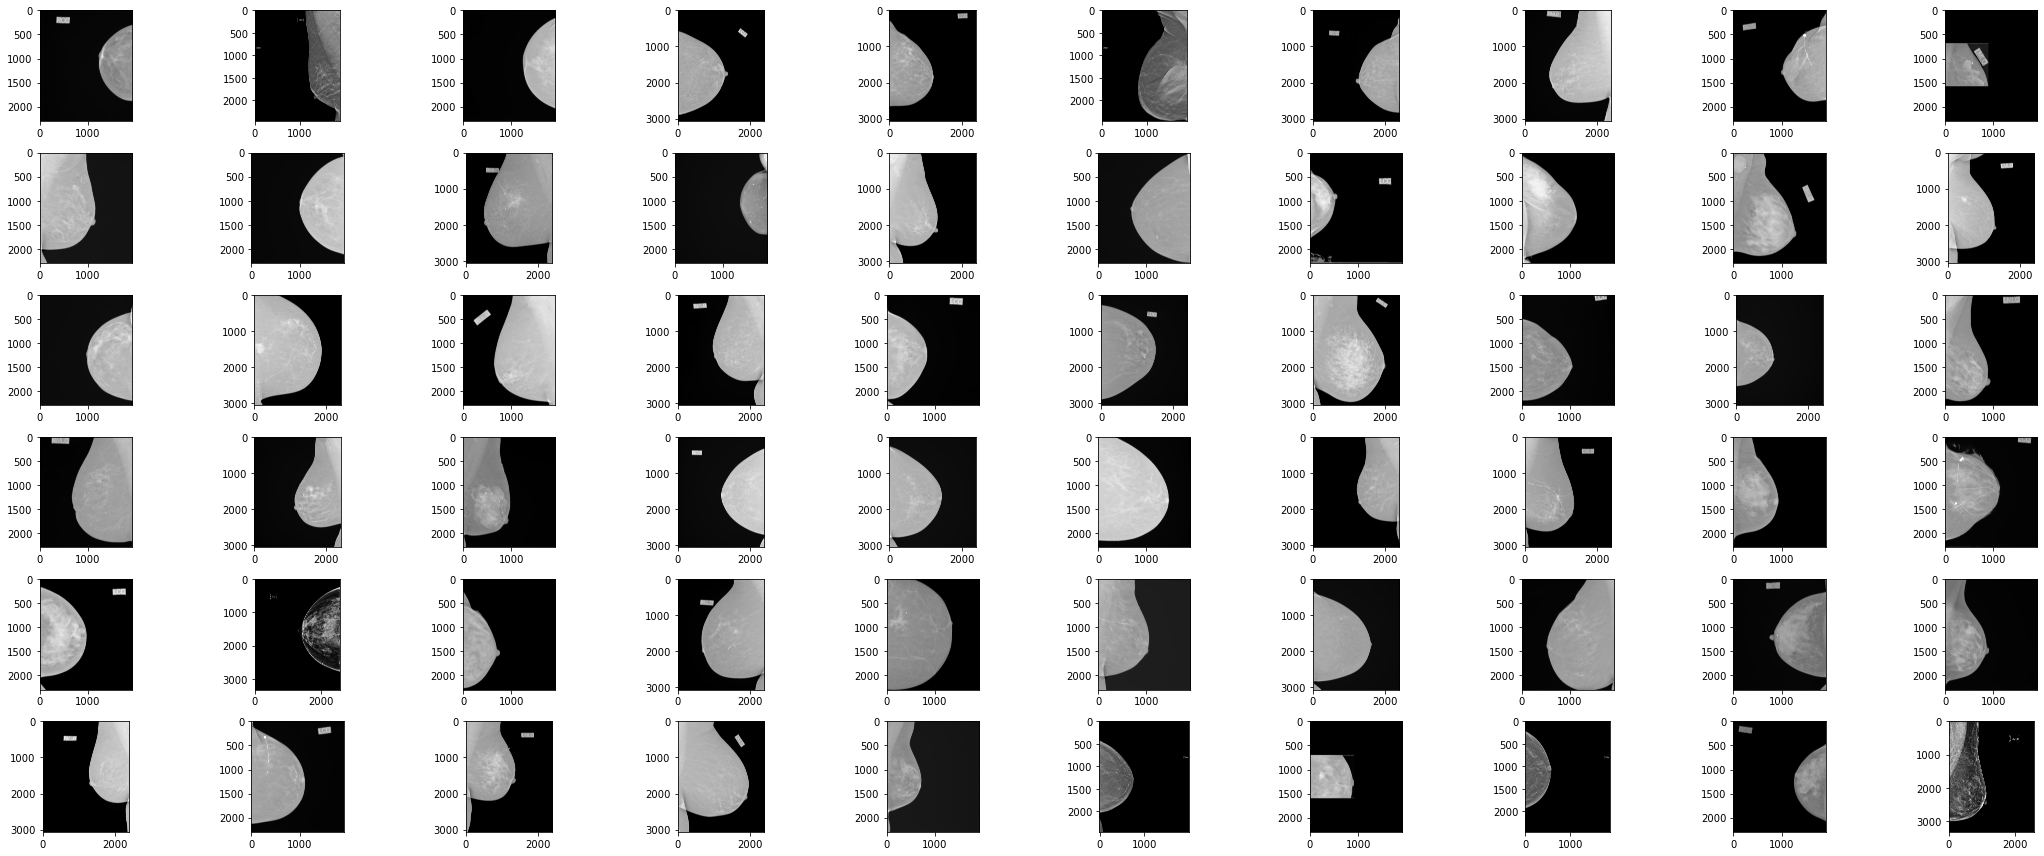

In [24]:
O.DataHelper.view_grid(img_rand)